# train_hyperasの確認

In [32]:
import numpy as np
import pandas as pd
#最大表示列数の指定
pd.set_option('display.max_columns', 300)

%matplotlib inline 
import matplotlib.pyplot as plt

plt.style.use('ggplot') 

In [33]:
race_df = pd.read_csv("./csv/cleaned_race_data.csv", sep=",", low_memory=False)
horse_df = pd.read_csv("./csv/cleaned_horse_data.csv", sep=",", low_memory=False)

In [34]:
predict_result = pd.read_csv("./predict/train_no_obstacle_by_MLmethods_predicted_test.csv", sep=",")
#predict_result = pd.read_csv("./predict/train_hyperas_predicted_test.csv", sep=",")

In [35]:
# 障害レースは取り除く
predict_result = predict_result[predict_result["is_obstacle"]==0]

In [36]:
predict_result.head()

,race_id,frame_number,horse_number,age,burden_weight,horse_weight,date,is_senba,is_mesu,is_osu,distance,horse_weight_dif,burden_weight_rate,ground_status,total_horse_number,is_obstacle,weather_rain,weather_snow,weather_小雨,weather_小雪,weather_晴,weather_曇,weather_雨,weather_雪,where_racecourse_中京,where_racecourse_中山,where_racecourse_京都,where_racecourse_函館,where_racecourse_小倉,where_racecourse_新潟,where_racecourse_札幌,where_racecourse_東京,where_racecourse_福島,where_racecourse_阪神,ground_type_ダ,ground_type_芝,is_left_right_straight_右,is_left_right_straight_左,is_left_right_straight_直線,pre_date_diff,is_rider_same,is_tamer_same,is_owner_same,rank_1,frame_number_1,horse_number_1,age_1,burden_weight_1,goal_time_1,half_way_rank_1,last_time_1,odds_1,popular_1,horse_weight_1,is_down_1,distance_1,avg_velocity_1,horse_weight_dif_1,burden_weight_rate_1,ground_status_1,total_horse_number_1,is_obstacle_1,weather_rain_1,weather_snow_1,weather_小雨_1,weather_小雪_1,weather_晴_1,weather_曇_1,weather_雨_1,weather_雪_1,where_racecourse_中京_1,where_racecourse_中山_1,where_racecourse_京都_1,where_racecourse_函館_1,where_racecourse_小倉_1,where_racecourse_新潟_1,where_racecourse_札幌_1,where_racecourse_東京_1,where_racecourse_福島_1,where_racecourse_阪神_1,ground_type_ダ_1,ground_type_芝_1,is_left_right_straight_右_1,is_left_right_straight_左_1,is_left_right_straight_直線_1,pre_date_diff_1,is_rider_same_1,is_tamer_same_1,is_owner_same_1,interval_date_1,rank_2,frame_number_2,horse_number_2,age_2,burden_weight_2,goal_time_2,half_way_rank_2,last_time_2,odds_2,popular_2,horse_weight_2,is_down_2,distance_2,avg_velocity_2,horse_weight_dif_2,burden_weight_rate_2,ground_status_2,total_horse_number_2,is_obstacle_2,weather_rain_2,weather_snow_2,weather_小雨_2,weather_小雪_2,weather_晴_2,weather_曇_2,weather_雨_2,weather_雪_2,where_racecourse_中京_2,where_racecourse_中山_2,where_racecourse_京都_2,where_racecourse_函館_2,where_racecourse_小倉_2,where_racecourse_新潟_2,where_racecourse_札幌_2,where_racecourse_東京_2,where_racecourse_福島_2,where_racecourse_阪神_2,ground_type_ダ_2,ground_type_芝_2,is_left_right_straight_右_2,is_left_right_straight_左_2,is_left_right_straight_直線_2,pre_date_diff_2,is_rider_same_2,is_tamer_same_2,is_owner_same_2,interval_date_2,rank_3,frame_number_3,horse_number_3,age_3,burden_weight_3,goal_time_3,half_way_rank_3,last_time_3,odds_3,popular_3,horse_weight_3,is_down_3,distance_3,avg_velocity_3,horse_weight_dif_3,burden_weight_rate_3,ground_status_3,total_horse_number_3,is_obstacle_3,weather_rain_3,weather_snow_3,weather_小雨_3,weather_小雪_3,weather_晴_3,weather_曇_3,weather_雨_3,weather_雪_3,where_racecourse_中京_3,where_racecourse_中山_3,where_racecourse_京都_3,where_racecourse_函館_3,where_racecourse_小倉_3,where_racecourse_新潟_3,where_racecourse_札幌_3,where_racecourse_東京_3,where_racecourse_福島_3,where_racecourse_阪神_3,ground_type_ダ_3,ground_type_芝_3,is_left_right_straight_右_3,is_left_right_straight_左_3,is_left_right_straight_直線_3,pre_date_diff_3,is_rider_same_3,is_tamer_same_3,is_owner_same_3,interval_date_3,rank_4,frame_number_4,horse_number_4,age_4,burden_weight_4,goal_time_4,half_way_rank_4,last_time_4,odds_4,popular_4,horse_weight_4,is_down_4,distance_4,avg_velocity_4,horse_weight_dif_4,burden_weight_rate_4,ground_status_4,total_horse_number_4,is_obstacle_4,weather_rain_4,weather_snow_4,weather_小雨_4,weather_小雪_4,weather_晴_4,weather_曇_4,weather_雨_4,weather_雪_4,where_racecourse_中京_4,where_racecourse_中山_4,where_racecourse_京都_4,where_racecourse_函館_4,where_racecourse_小倉_4,where_racecourse_新潟_4,where_racecourse_札幌_4,where_racecourse_東京_4,where_racecourse_福島_4,where_racecourse_阪神_4,ground_type_ダ_4,ground_type_芝_4,is_left_right_straight_右_4,is_left_right_straight_左_4,is_left_right_straight_直線_4,pre_date_diff_4,is_rider_same_4,is_tamer_same_4,is_owner_same_4,interval_date_4,rank_5,frame_number_5,horse_number_5,age_5,burden_weight_5,goal_time_5,half_way_rank_5,last_time_5,odds_5,popular_5,horse_weight_5,is_down_5,distance_5,avg_velocity_5,horse_weight_dif_5,burden_weight_rate_5,ground_status_5,total_horse_number_5,is_obstacle_5,weath

In [37]:
# 予測値を100倍して見やすくする
predict_result["predict_is_tansyo"] = predict_result["predict_is_tansyo"]*100
predict_result["predict_is_hukusyo"] = predict_result["predict_is_hukusyo"]*100

In [38]:
predict_result.shape

(101269, 282)

## accuracy の計算
groupbyして、レースごとに確率の最も高い馬を見つける。
正解していたかを判定

In [39]:
# group by したデータフレームに対して行う処理
def check_is_correct_predict_is_tansyo(one_race_data):
    max_pred_horse = one_race_data.loc[one_race_data['predict_is_tansyo'].idxmax()]
    return max_pred_horse['is_tansyo']
def check_is_correct_predict_is_hukusyo(one_race_data):
    max_pred_horse = one_race_data.loc[one_race_data['predict_is_hukusyo'].idxmax()]
    return max_pred_horse['is_hukusyo']

In [40]:
part_predict_result = predict_result[["race_id","date","horse_number","predict_is_hukusyo", "is_hukusyo","predict_is_tansyo", "is_tansyo"]]

is_tansyo = part_predict_result.groupby('race_id').apply(check_is_correct_predict_is_tansyo)
is_hukusyo = part_predict_result.groupby('race_id').apply(check_is_correct_predict_is_hukusyo)
print("tansyo accuracy: {}".format(is_tansyo.sum()/is_tansyo.size))
print("hukusyo accuracy: {}".format(is_hukusyo.sum()/is_hukusyo.size))

tansyo accuracy: 0.2511470985155196
hukusyo accuracy: 0.5468286099865047


In [68]:
threshold = 0.62 * 100
# group by したデータフレームに対して行う処理
def check_is_correct_predict_is_tansyo_only_threshold(one_race_data):
    max_pred_horse = one_race_data.loc[one_race_data['predict_is_tansyo'].idxmax()]
    return None if max_pred_horse['predict_is_tansyo'] < threshold else max_pred_horse['is_tansyo']
def check_is_correct_predict_is_hukusyo_only_threshold(one_race_data):
    max_pred_horse = one_race_data.loc[one_race_data['predict_is_hukusyo'].idxmax()]
    return None if max_pred_horse['predict_is_hukusyo'] < threshold else max_pred_horse['is_hukusyo']


is_tansyo = part_predict_result.groupby('race_id').apply(check_is_correct_predict_is_tansyo_only_threshold)
is_hukusyo = part_predict_result.groupby('race_id').apply(check_is_correct_predict_is_hukusyo_only_threshold)

print("number of all race: {}".format(is_tansyo.size))
is_tansyo = is_tansyo.dropna()
is_hukusyo = is_hukusyo.dropna()
print("number of race after droping low predict (tansyo): {}".format(is_tansyo.size))
print("tansyo accuracy: {}".format(is_tansyo.sum()/is_tansyo.size))
print("number of race after droping low predict (hukusyo): {}".format(is_hukusyo.size))
print("hukusyo accuracy: {}".format(is_hukusyo.sum()/is_hukusyo.size))


number of all race: 7410
number of race after droping low predict (tansyo): 887
tansyo accuracy: 0.3528748590755355
number of race after droping low predict (hukusyo): 301
hukusyo accuracy: 0.7408637873754153


# blending
お互いの欠点を補い合えるかも...？

In [42]:
blend_df = predict_result.copy()
blend_df["blend"] = 0.5*blend_df["predict_is_tansyo"] + 0.5*blend_df["predict_is_hukusyo"]
blend_df = blend_df[["race_id","date","horse_number", "blend","is_hukusyo", "is_tansyo"]]

def blend_check_is_correct_predict_is_tansyo(one_race_data):
    return one_race_data.loc[one_race_data['blend'].idxmax()]['is_tansyo']
def blend_check_is_correct_predict_is_hukusyo(one_race_data):
    return one_race_data.loc[one_race_data['blend'].idxmax()]['is_hukusyo']

is_tansyo = blend_df.groupby('race_id').apply(blend_check_is_correct_predict_is_tansyo)
is_hukusyo = blend_df.groupby('race_id').apply(blend_check_is_correct_predict_is_hukusyo)
print("tansyo accuracy: {}".format(is_tansyo.sum()/is_tansyo.size))
print("hukusyo accuracy: {}".format(is_hukusyo.sum()/is_hukusyo.size))

tansyo accuracy: 0.2535762483130904
hukusyo accuracy: 0.5508771929824562


## 同着の試合があるかもしれないので取り除く
同着はデータがおかしくなっているので取り除く。
また、10頭以下のレースは取り除く

In [43]:
merged_df = pd.merge(blend_df, race_df, on="race_id")
merged_df = pd.merge(merged_df, horse_df, on=['race_id','horse_number'])
merged_df['tansyo_return'] = merged_df['is_tansyo']*merged_df['tansyo'] - 100
merged_df["hukusyo_return"] = (merged_df["rank"]==1)*merged_df["hukusyo_first"] + (merged_df["rank"]==2)*merged_df["hukusyo_second"] + (merged_df["rank"]==3)*merged_df["hukusyo_third"]  - 100

In [44]:
def remove_same(one_horse_data):
    #  数レース分の情報を結合
    result_df = one_horse_data.copy()
    
    if result_df["rank"].duplicated().sum() or result_df["total_horse_number"].iloc[0]<10:
        return 
    else:
        return result_df

In [45]:
print(merged_df.shape)
removed = merged_df.groupby("race_id").apply(remove_same)
print(removed.shape)

(101269, 61)
(91947, 61)


## 可視化

In [46]:
removed = removed.reset_index(drop=True)
removed.head()

,race_id,date_x,horse_number,blend,is_hukusyo,is_tansyo,race_round,weather,ground_status,date_y,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,is_obstacle,ground_type,is_left_right_straight,distance_x,weather_rain,weather_snow,rank,frame_number,horse_id,age,burden_weight,rider_id,goal_time,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance_y,avg_velocity,horse_weight_dif,burden_weight_rate,tansyo_return,hukusyo_return
0,201901010304,2019-08-03 11:25:00,7.0,30.052443,1,0,4,晴,1,2019-08-03 11:25:00,札幌,14,4,5,5,7,6,9,1870,370,1560,310,8000,38040,6740,2390,10310,66310,98900,939760,0.0,ダ,右,1700,0,0,2,5,2016103487,3,56.0,1025,107.1,8.25,38.9,99.0,11.0,424.0,1100,13803,2019-08-03 11:25:00,0,0,0,1,1700,15.873016,-2.0,0.132075,-100,1460
1,201901010304,2019-08-03 11:25:00,8.0,33.358739,0,0,4,晴,1,2019-08-03 11:25:00,札幌,14,4,5,5,7,6,9,1870,370,1560,310,8000,38040,6740,2390,10310,66310,98900,939760,0.0,ダ,右,1700,0,0,8,5,2016100325,3,54.0,1160,107.7,6.25,39.7,46.9,10.0,428.0,1159,336030,2019-08-03 11:25:00,0,0,1,0,1700,15.784587,-10.0,0.126168,-100,-100
2,201901010304,2019-08-03 11:25:00,3.0,59.141826,0,0,4,晴,1,2019-08-03 11:25:00,札幌,14,4,5,5,7,6,9,1870,370,1560,310,8000,38040,6740,2390,10310,66310,98900,939760,0.0,ダ,右,1700,0,0,6,3,2016104832,3,56.0,5203,107.5,9.75,39.0,3.5,2.0,474.0,422,872800,2019-08-03 11:25:00,0,0,0,1,1700,15.813953,2.0,0.118143,-100,-100
3,201901010304,2019-08-03 11:25:00,9.0,50.528571,1,0,4,晴,1,2019-08-03 11:25:00,札幌,14,4,5,5,7,6,9,1870,370,1560,310,8000,38040,6740,2390,10310,66310,98900,939760,0.0,ダ,右,1700,0,0,3,6,2016104794,3,56.0,1032,107.3,3.00,39.5,9.7,4.0,500.0,1085,790005,2019-08-03 11:25:00,0,0,0,1,1700,15.843430,20.0,0.112000,-100,210
4,201901010304,2019-08-03 11:25:00,12.0,60.476773,0,0,4,晴,1,2019-08-03 11:25:00,札幌,14,4,5,5,7,6,9,1870,370,1560,310,8000,38040,6740,2390,10310,66310,98900,939760,0.0,ダ,右,1700,0,0,4,7,2016106426,3,56.0,5339,107.3,1.75,39.6,2.0,1.0,466.0,1113,440006,2019-08-03 11:25:00,0,0,0,1,1700,15.843430,-2.0,0.120172,-100,-100


<AxesSubplot:ylabel='Frequency'>

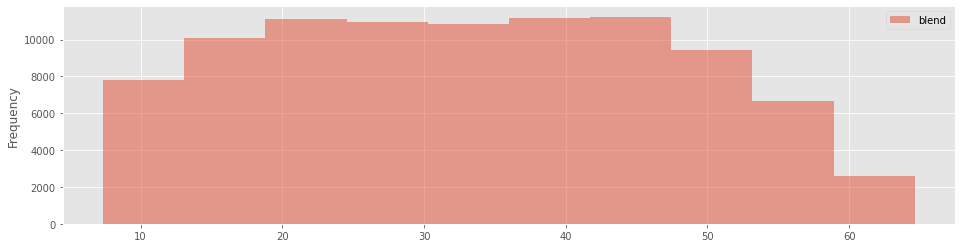

In [47]:
# blendの分布についてヒストグラム
removed.plot(kind='hist', y='blend' , bins=10, figsize=(16,4), alpha=0.5)

<AxesSubplot:xlabel='blend', ylabel='odds'>

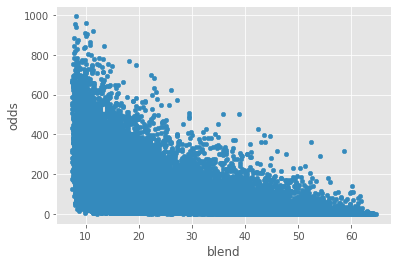

In [48]:
# オッズと予測値
removed.plot(kind='scatter', x='blend', y='odds')

<AxesSubplot:xlabel='blend', ylabel='odds'>

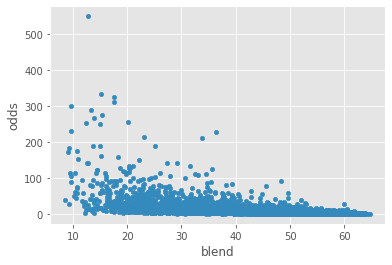

In [49]:
# 実際に1位になったものについてのオッズと予測値
removed[removed["rank"]==1].plot(kind='scatter', x='blend', y='odds')

<AxesSubplot:xlabel='blend', ylabel='odds'>

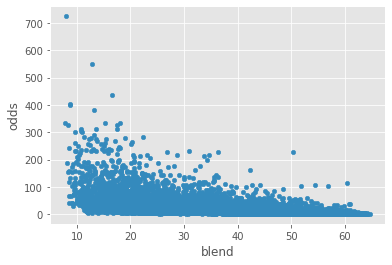

In [50]:
# 実際に複勝圏内になったものについてのオッズと予測値
removed[removed["rank"]<=3].plot(kind='scatter', x='blend', y='odds')

## 的中率の計算(実際に1位や３位以内であった確率）

In [51]:
# cut
removed["blend_cut"] = pd.cut(removed["blend"], 10)

<AxesSubplot:xlabel='blend_cut'>

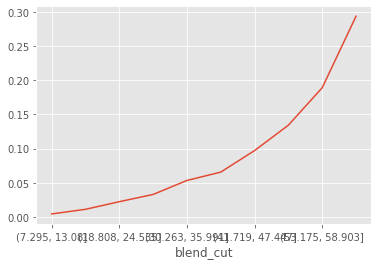

In [52]:
# tansyo
def right_rate_tansyo(one_cut):
    return one_cut["is_tansyo"].sum()/len(one_cut)
    
removed.groupby("blend_cut").apply(right_rate_tansyo).plot()

<AxesSubplot:xlabel='blend_cut'>

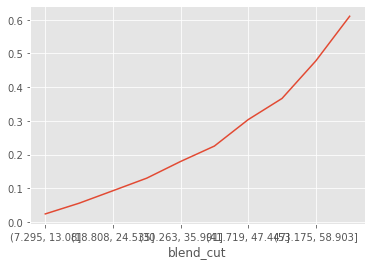

In [53]:
# hukusyo
def right_rate_hukusyo(one_cut):
    return one_cut["is_hukusyo"].sum()/len(one_cut)
    
removed.groupby("blend_cut").apply(right_rate_hukusyo).plot()

## 回収率の計算

In [54]:
def get_return(one_race):
    tmp = one_race.reset_index()
    return tmp.loc[tmp['blend'].idxmax(),['tansyo_return','hukusyo_return','odds','date','blend']]

race_result = removed.groupby("race_id").apply(get_return)

In [55]:
race_result = race_result.sort_values("date")

In [56]:
race_result = race_result.set_index("date")

### 単勝

<AxesSubplot:xlabel='date'>

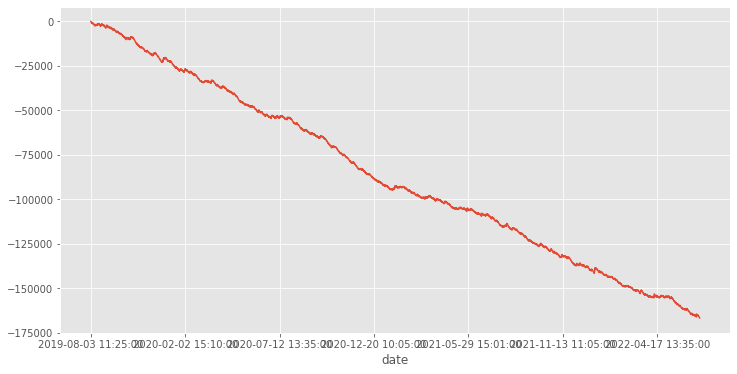

In [57]:
# 単純に買い続けたとき
simple = race_result["tansyo_return"].cumsum()
simple.plot(figsize=(12, 6))

<AxesSubplot:xlabel='date'>

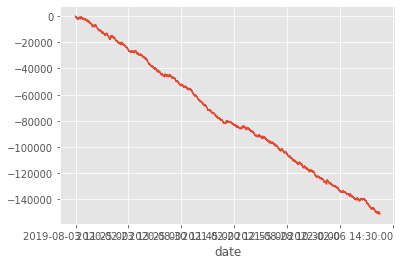

In [58]:
# breandがある程度あるときだけ
simple = race_result.loc[(race_result["blend"]>50), 'tansyo_return'].cumsum()
simple.plot()

<AxesSubplot:xlabel='date'>

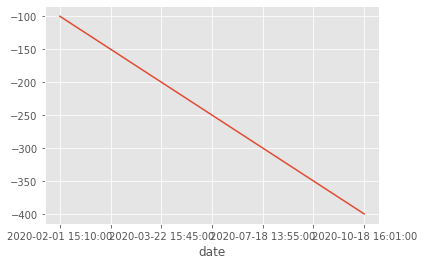

In [69]:
# オッズがある範囲のとき
simple = race_result.loc[((race_result["odds"]>10) & (race_result["odds"]<60) & (race_result["blend"]>62)), 'tansyo_return'].cumsum()
simple.plot()

### 複勝

<AxesSubplot:xlabel='date'>

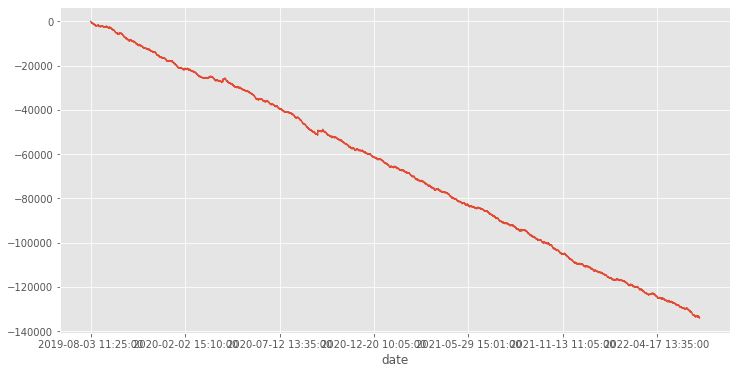

In [60]:
# 単純に買い続けたとき
simple = race_result["hukusyo_return"].cumsum()
simple.plot(figsize=(12, 6))

<AxesSubplot:xlabel='date'>

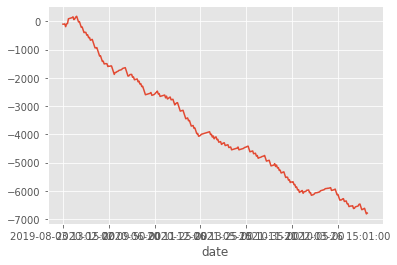

In [71]:
# blendの予測値を含める
simple = race_result.loc[(race_result["blend"]>62), 'hukusyo_return'].cumsum()
simple.plot()

<AxesSubplot:xlabel='date'>

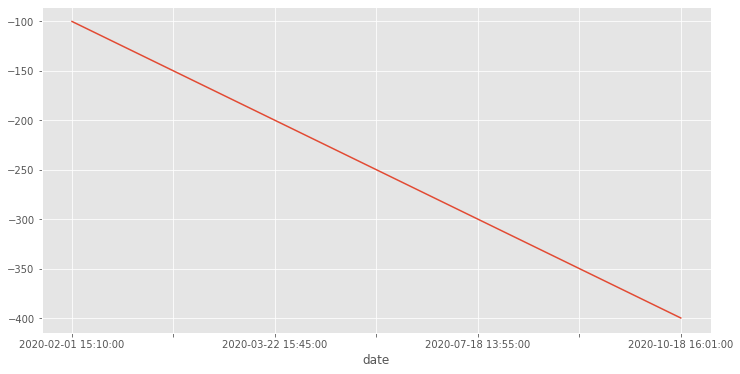

In [70]:
# オッズがある範囲のとき
simple = race_result.loc[((race_result["odds"]>10.0) & (race_result["odds"]<65) & (race_result["blend"]>62)), 'hukusyo_return'].cumsum()
simple.plot(figsize=(12, 6))